# SPEED RESISTANCE LINES (SRL)

https://stockcharts.com/school/doku.php?id=chart_school:chart_analysis:speed_resistance_lin

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-12-01'
end = '2019-02-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-03,184.460007,184.940002,181.210007,184.820007,184.030731,40802500
2018-12-04,180.949997,182.389999,176.270004,176.690002,175.935455,41344300
2018-12-06,171.759995,174.779999,170.419998,174.720001,173.973862,43098400
2018-12-07,173.490005,174.490005,168.300003,168.490005,167.770477,42281600
2018-12-10,165.000000,170.089996,163.330002,169.600006,168.875732,62026000


In [3]:
df['Middle_Line'] = df['Low'] + (df['High'] - df['Low']) * .667
df['Lower_Line'] = df['Low'] + (df['High'] - df['Low']) * .333

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Middle_Line,Lower_Line
Date,,,,,,,,
2018-12-03,184.460007,184.940002,181.210007,184.820007,184.030731,40802500,183.697914,182.452095
2018-12-04,180.949997,182.389999,176.270004,176.690002,175.935455,41344300,180.352041,178.307962
2018-12-06,171.759995,174.779999,170.419998,174.720001,173.973862,43098400,173.328119,171.871878
2018-12-07,173.490005,174.490005,168.300003,168.490005,167.770477,42281600,172.428734,170.361274
2018-12-10,165.000000,170.089996,163.330002,169.600006,168.875732,62026000,167.838918,165.581080


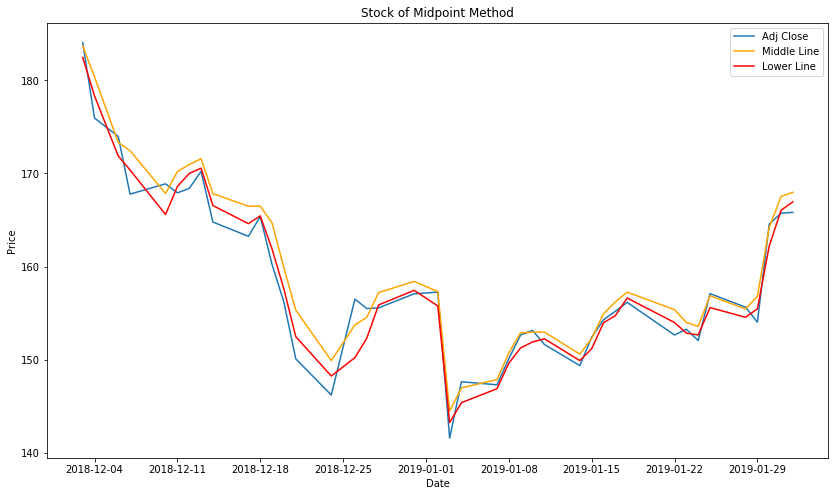

In [5]:
plt.figure(figsize=(14,8))
plt.plot(df['Adj Close'])
plt.plot(df['Middle_Line'], color='orange', label='Middle Line')
plt.plot(df['Lower_Line'], color='red', label='Lower Line')
plt.legend(loc='best')
plt.title('Stock of Midpoint Method')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [6]:
def connectpoints():
    x1, x2 = df['Low'].loc['2019-01-01':].idxmin(), df['Adj Close'].loc['2019-01-01':].idxmax()
    y1, y2 = df['Low'].loc['2019-01-01':].min(), df['Adj Close'].loc['2019-01-01':].max()
    plt.plot([x1,x2],[y1,y2],'y-')
    return

In [7]:
def connectpoints2():
    x1, x2 = df['Low'].loc['2019-01-01':].idxmin(), df['Adj Close'].loc['2019-01-01':].idxmax()
    y1, y2 = df['Low'].loc['2019-01-01':].min(), df['Middle_Line'].loc['2019-01-01':].max()
    plt.plot([x1,x2],[y1,y2],'g-')
    return

In [8]:
def connectpoints3():
    x1, x2 = df['Low'].loc['2019-01-01':].idxmin(), df['Adj Close'].loc['2019-01-01':].idxmax()
    y1, y2 = df['Low'].loc['2019-01-01':].min(), df['Lower_Line'].loc['2019-01-01':].max()
    plt.plot([x1,x2],[y1,y2],'r-')
    return

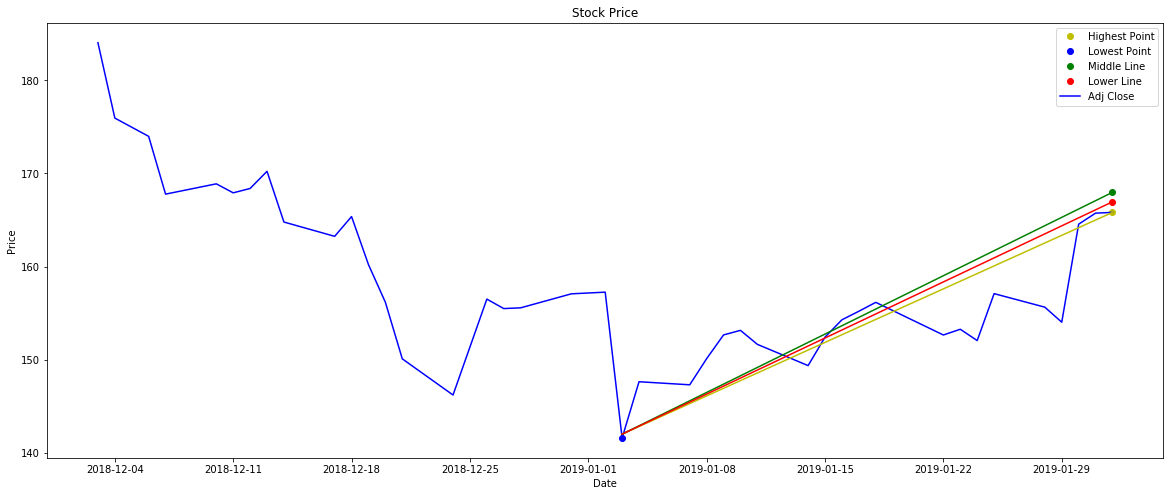

In [9]:
# Connect the points
plt.figure(figsize=(20,8))
plt.plot(df['Low'].loc['2019-01-01':].idxmax(), df['Adj Close'].loc['2019-01-01':].max(), 'yo', label='Highest Point')
plt.plot(df['Low'].loc['2019-01-01':].idxmin(), df['Adj Close'].loc['2019-01-01':].min(), 'bo', label='Lowest Point')
plt.plot(df['Low'].loc['2019-01-01':].idxmax(), df['Middle_Line'].loc['2019-01-01':].max(), 'go', label='Middle Line')
plt.plot(df['Low'].loc['2019-01-01':].idxmax(), df['Lower_Line'].loc['2019-01-01':].max(), 'ro', label='Lower Line')
plt.plot(df['Adj Close'], color='blue')
connectpoints()
connectpoints2()
connectpoints3()
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

## Candlestick wtih Speed Resistance Lines

In [10]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Middle_Line,Lower_Line,VolumePositive
0,737031.0,184.460007,184.940002,181.210007,184.820007,184.030731,40802500,183.697914,182.452095,False
1,737032.0,180.949997,182.389999,176.270004,176.690002,175.935455,41344300,180.352041,178.307962,False
2,737034.0,171.759995,174.779999,170.419998,174.720001,173.973862,43098400,173.328119,171.871878,True
3,737035.0,173.490005,174.490005,168.300003,168.490005,167.770477,42281600,172.428734,170.361274,False
4,737038.0,165.000000,170.089996,163.330002,169.600006,168.875732,62026000,167.838918,165.581080,True


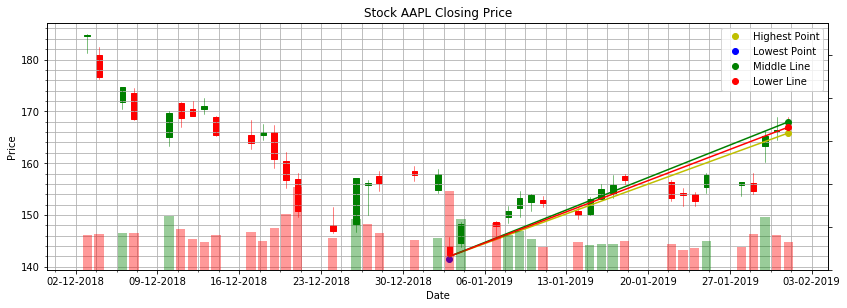

In [11]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df['Low'].loc['2019-01-01':].idxmax(), df['Adj Close'].loc['2019-01-01':].max(), 'yo', label='Highest Point')
ax1.plot(df['Low'].loc['2019-01-01':].idxmin(), df['Adj Close'].loc['2019-01-01':].min(), 'bo', label='Lowest Point')
ax1.plot(df['Low'].loc['2019-01-01':].idxmax(), df['Middle_Line'].loc['2019-01-01':].max(), 'go', label='Middle Line')
ax1.plot(df['Low'].loc['2019-01-01':].idxmax(), df['Lower_Line'].loc['2019-01-01':].max(), 'ro', label='Lower Line')
connectpoints()
connectpoints2()
connectpoints3()
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.legend(loc='best')